C:\Users\souma\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


maze_shape
 [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' 'S' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' 'G' '0' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:09<00:00,  5.06it/s]


0
[103, 147, 45, 339, 159, 147, 47, 13, 11, 69, 11, 53, 13, 11, 13, 11, 13, 11, 13, 11, 11, 15, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 13, 13, 11, 11, 11, 11, 11, 11]


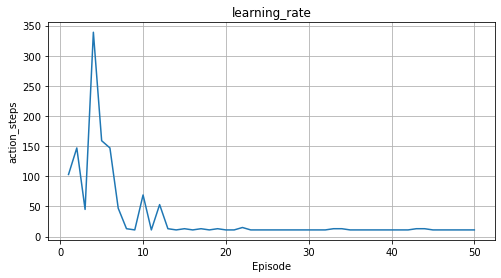

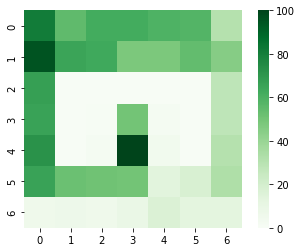

Finish


In [ ]:
from environment import Maze
from agent import Agent
import numpy as np
import pandas as pd

def train():
    kernel = 2 # Thickness of the outer wall of the maze (extension)
    start = [1, 1] # Specify the start position
    goal = [4, 4] # Specify the goal position
    log_step_all = [] # Record the number of actions for each epoch
      
    """Automatically generate the maze"""
    env = Maze(7, 7) # Specify the size of the maze
    env.set_out_wall() # Surround the maze with walls
    env.set_start_goal(start, goal) # Specify start and goal
    env.bg_maze(kernel) # Expand the maze cells by kernel

    """Generate agent in the environment and train"""
    epochs = 1 # Number of episode trials
    episode_count = 50 # Number of episodes
    for epoch in range(1, epochs+1):
        agent = Agent(env.maze, action_num=4) # Pass the maze with start/goal/wall etc. to the agent
        env.run(agent, epoch, episode_count)
        log_step_all.append(env.a_list)

    print('Finish')


if __name__ == "__main__":
    train()

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [08:44<00:00,  2.62s/it]


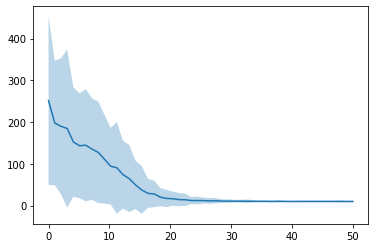

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Read the CSV file as a DataFrame
a_cnt_all = []

for i in tqdm(range(1, 201)):
    df = pd.read_csv('sampleA-('+str(i)+', 1, 0.1).csv')
    df = df[df['reward'] == 1]
    df = df['a_cnt']
    df = np.array(df)
    a_cnt_all.append(df)
# Display the DataFrame
# print(np.array(a_cnt_all))
ave_vl = np.mean(a_cnt_all, axis=0)
sigma_vl = np.std(a_cnt_all, axis=0)

x = np.linspace(0, 50)
plt.plot(x, ave_vl)
plt.fill_between(x, ave_vl+sigma_vl, ave_vl-sigma_vl, alpha=0.3)

df = pd.DataFrame(list(zip(ave_vl, ave_vl+sigma_vl, ave_vl-sigma_vl)), columns=['mean', '+', '-'])
df.to_csv('steps_QBG.csv', index=False)

How many times can it reach the minimum in 100 epochs

maze_shape
 [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' 'S' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' 'G' '0' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]


100%|██████████| 100/100 [00:19<00:00,  5.25it/s]


78
[44, 402, 436, 326, 70, 16, 66, 142, 210, 126, 168, 50, 10, 176, 14, 38, 12, 38, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


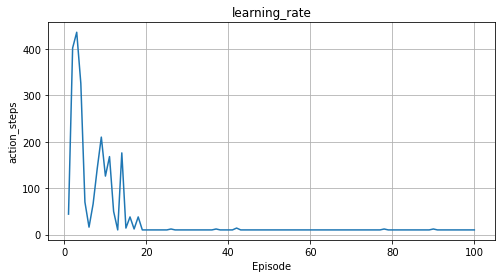

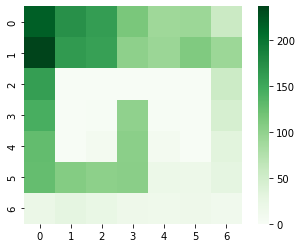

100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


78
[108, 128, 264, 88, 36, 250, 32, 184, 14, 118, 186, 64, 56, 86, 10, 28, 32, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10]


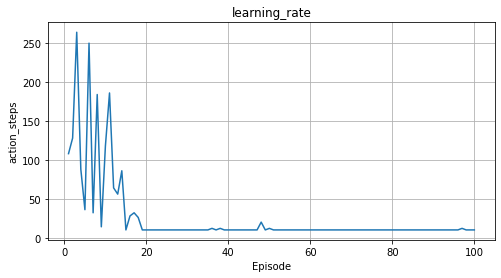

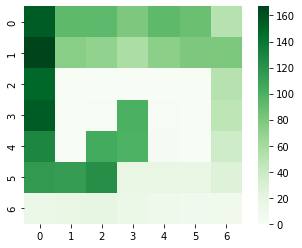

100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


78
[52, 172, 90, 240, 106, 294, 98, 58, 108, 174, 154, 32, 70, 110, 70, 68, 70, 32, 10, 22, 22, 32, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


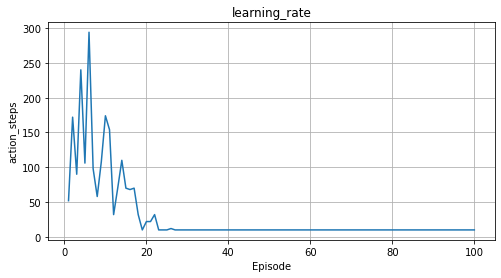

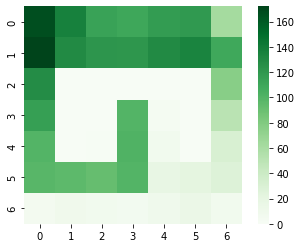

100%|██████████| 100/100 [00:17<00:00,  5.84it/s]


79
[368, 246, 282, 90, 352, 96, 60, 12, 54, 142, 16, 162, 12, 14, 10, 10, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10]


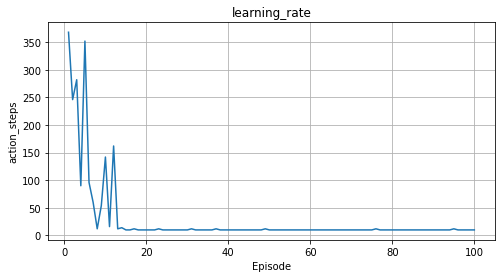

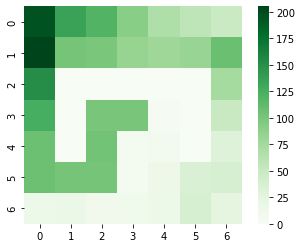

100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


0
[182, 118, 56, 438, 54, 266, 380, 42, 86, 162, 36, 178, 20, 130, 86, 152, 26, 70, 78, 90, 20, 54, 16, 14, 14, 14, 18, 14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14]


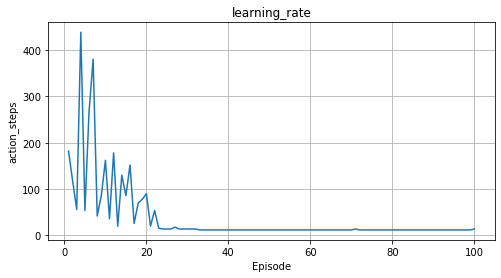

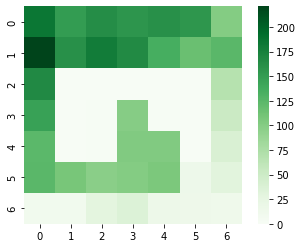

100%|██████████| 100/100 [00:17<00:00,  5.88it/s]


81
[278, 168, 94, 506, 76, 98, 48, 16, 76, 62, 164, 32, 100, 58, 48, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


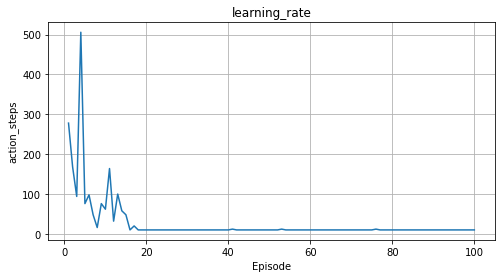

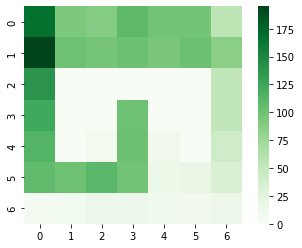

100%|██████████| 100/100 [00:16<00:00,  6.10it/s]


85
[114, 188, 252, 116, 110, 336, 28, 22, 122, 160, 224, 14, 16, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


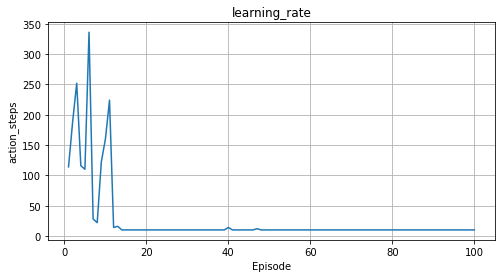

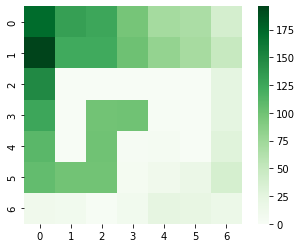

100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


69
[138, 356, 64, 168, 144, 428, 206, 52, 238, 240, 242, 492, 70, 34, 68, 72, 192, 42, 14, 30, 48, 20, 160, 14, 50, 30, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


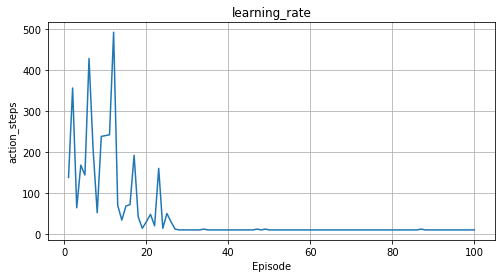

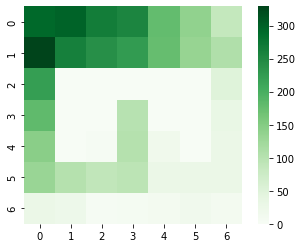

100%|██████████| 100/100 [00:17<00:00,  5.69it/s]


80
[736, 168, 434, 100, 110, 108, 24, 32, 104, 48, 44, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 30, 10, 10, 10, 14, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 12, 10, 10, 10, 10]


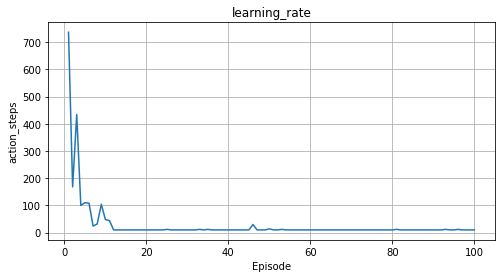

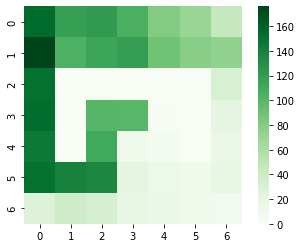

100%|██████████| 100/100 [00:18<00:00,  5.31it/s]


73
[88, 92, 196, 224, 78, 142, 126, 150, 180, 108, 88, 38, 166, 158, 110, 22, 52, 12, 44, 76, 38, 54, 14, 14, 70, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12]


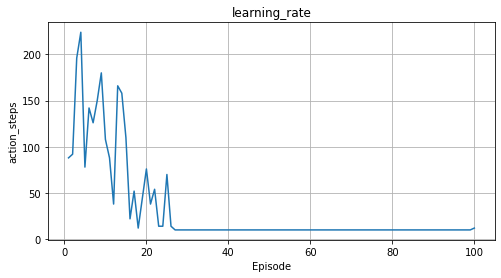

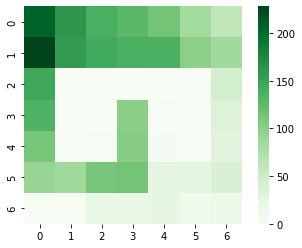

100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


78
[254, 44, 106, 26, 64, 246, 34, 50, 142, 144, 250, 10, 32, 14, 92, 48, 26, 16, 24, 12, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


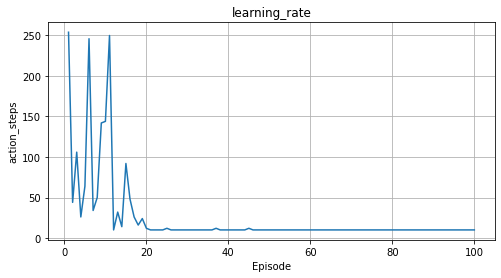

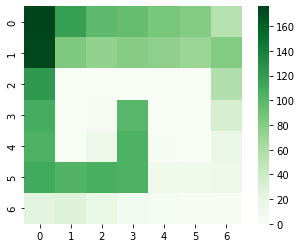

100%|██████████| 100/100 [00:23<00:00,  4.27it/s]


87
[570, 932, 262, 208, 112, 44, 294, 54, 168, 32, 104, 14, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


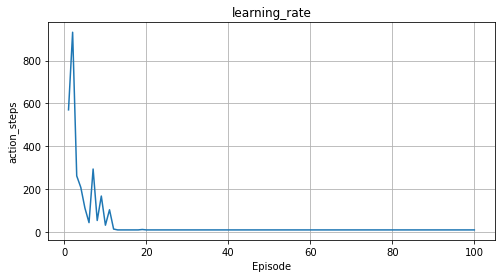

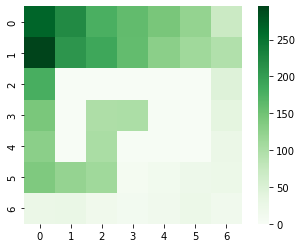

100%|██████████| 100/100 [00:25<00:00,  3.94it/s]


76
[564, 26, 68, 610, 72, 34, 378, 250, 30, 216, 174, 50, 214, 88, 100, 92, 54, 118, 62, 24, 16, 18, 24, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


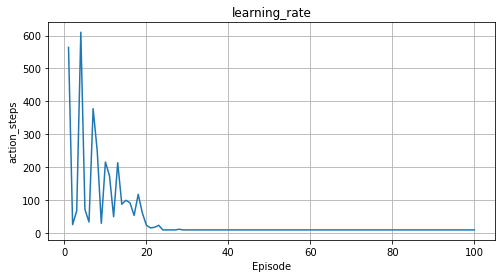

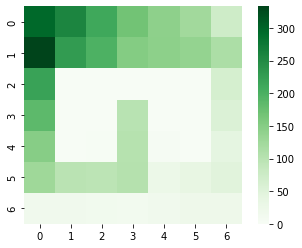

100%|██████████| 100/100 [00:23<00:00,  4.26it/s]

69
[134, 128, 134, 112, 208, 110, 168, 214, 266, 52, 74, 92, 42, 138, 66, 460, 130, 124, 120, 56, 70, 36, 42, 24, 30, 26, 26, 20, 12, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 16, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


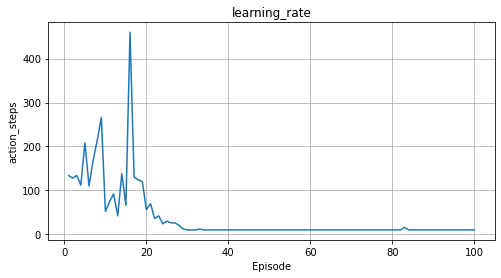

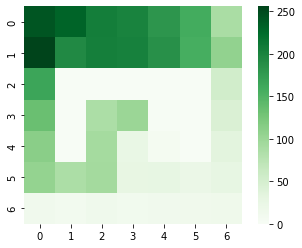

100%|██████████| 100/100 [00:10<00:00,  9.79it/s]


83
[58, 136, 40, 212, 58, 80, 34, 88, 30, 18, 12, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


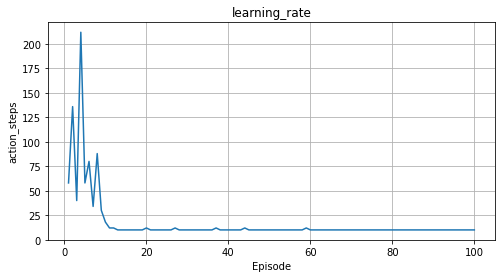

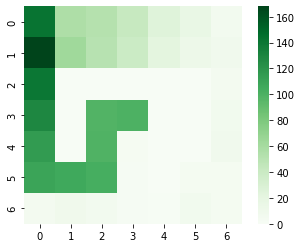

100%|██████████| 100/100 [00:21<00:00,  4.55it/s]


80
[90, 392, 160, 98, 244, 518, 14, 50, 48, 18, 234, 148, 650, 88, 18, 16, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


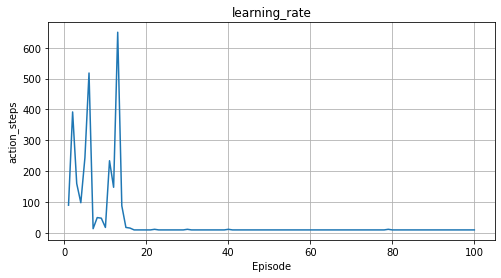

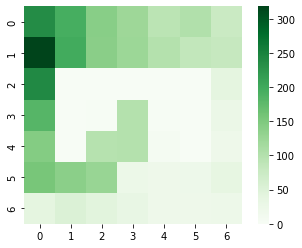

100%|██████████| 100/100 [00:22<00:00,  4.43it/s]


77
[144, 510, 398, 62, 122, 126, 46, 90, 604, 134, 36, 204, 36, 42, 50, 16, 58, 12, 32, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10]


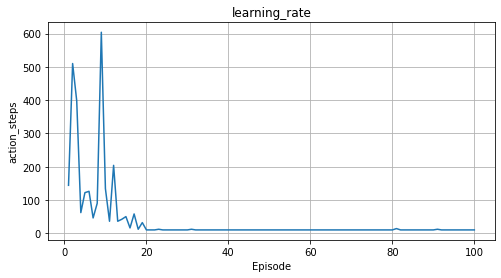

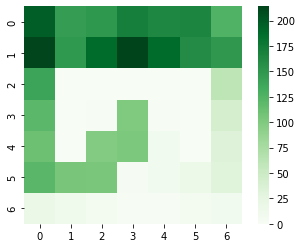

100%|██████████| 100/100 [00:17<00:00,  5.71it/s]


81
[166, 240, 54, 48, 44, 400, 22, 390, 20, 144, 252, 84, 12, 66, 46, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


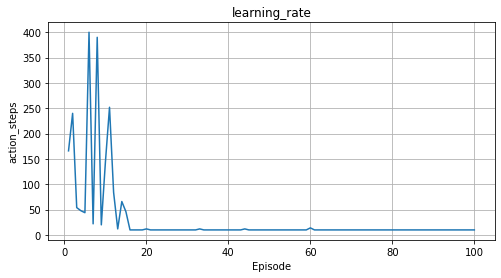

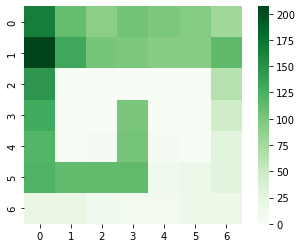

100%|██████████| 100/100 [00:26<00:00,  3.79it/s]


0
[146, 332, 58, 114, 56, 296, 296, 48, 56, 128, 372, 382, 30, 24, 194, 76, 64, 106, 50, 50, 24, 44, 32, 20, 22, 136, 28, 34, 34, 28, 18, 26, 20, 18, 20, 22, 12, 16, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12]


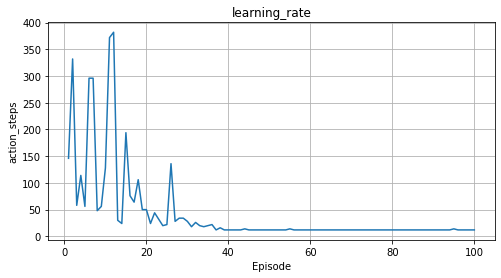

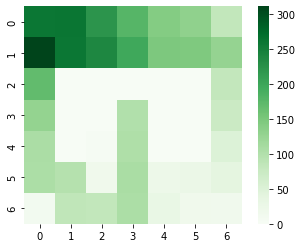

100%|██████████| 100/100 [00:34<00:00,  2.92it/s]


0
[76, 458, 218, 468, 114, 142, 300, 190, 92, 206, 138, 44, 236, 296, 340, 94, 104, 124, 200, 14, 38, 210, 30, 264, 46, 14, 60, 22, 20, 16, 86, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]


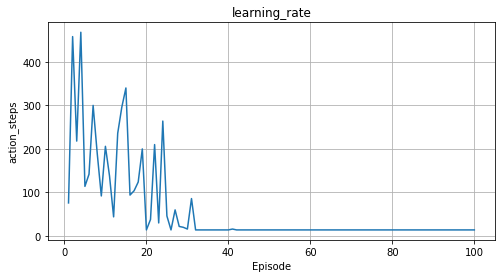

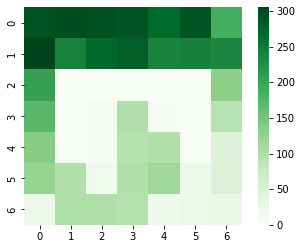

100%|██████████| 100/100 [00:22<00:00,  4.44it/s]


77
[36, 692, 158, 500, 176, 390, 22, 28, 190, 96, 18, 86, 10, 140, 32, 84, 20, 12, 26, 80, 10, 10, 10, 12, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


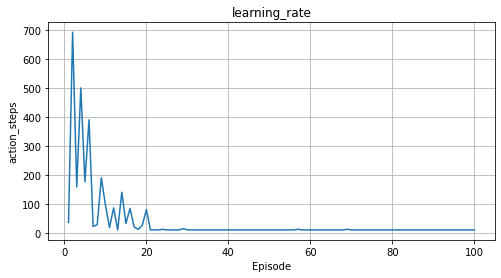

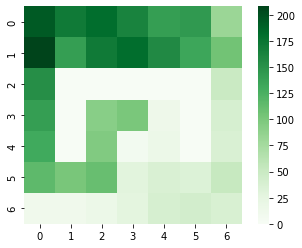

100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


78
[86, 650, 34, 380, 346, 146, 226, 242, 52, 196, 164, 30, 20, 20, 30, 30, 52, 14, 28, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


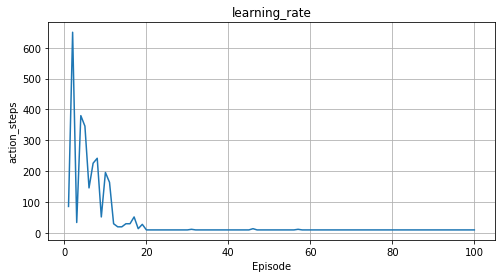

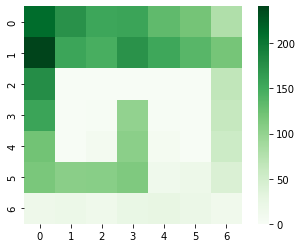

100%|██████████| 100/100 [00:20<00:00,  4.83it/s]


77
[552, 106, 162, 200, 80, 50, 106, 114, 70, 152, 120, 142, 182, 36, 36, 124, 86, 14, 12, 62, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


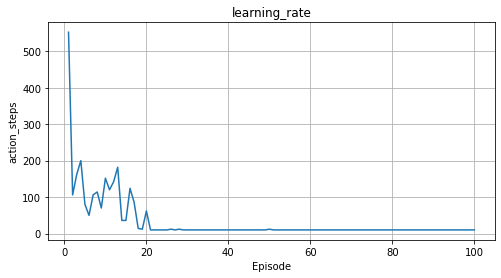

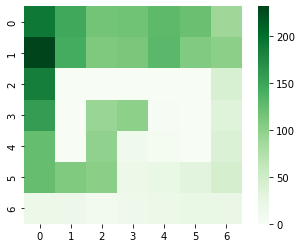

100%|██████████| 100/100 [00:15<00:00,  6.28it/s]


0
[262, 44, 38, 314, 94, 114, 88, 202, 54, 22, 16, 204, 12, 12, 16, 30, 16, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 18, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


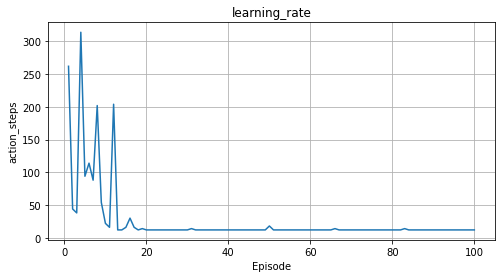

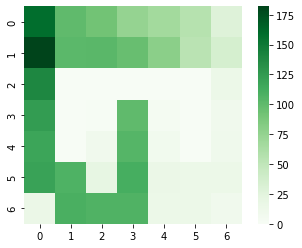

100%|██████████| 100/100 [00:26<00:00,  3.82it/s]


0
[744, 198, 216, 186, 362, 78, 166, 624, 206, 60, 178, 140, 86, 20, 48, 14, 12, 24, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


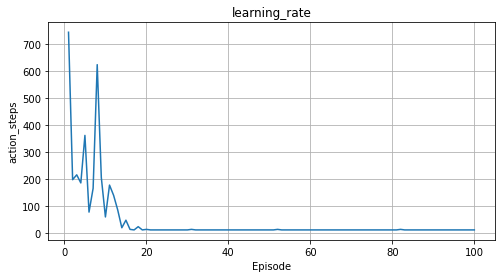

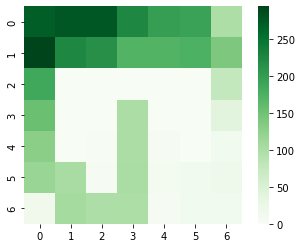

100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


0
[102, 220, 374, 78, 42, 68, 36, 260, 44, 256, 68, 32, 16, 296, 32, 14, 118, 92, 118, 22, 20, 38, 18, 12, 26, 16, 16, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12]


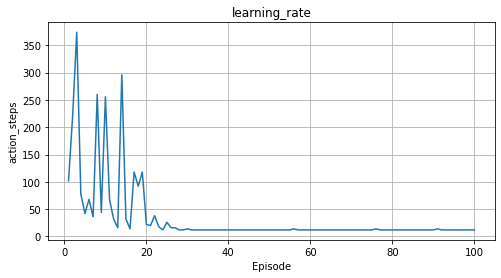

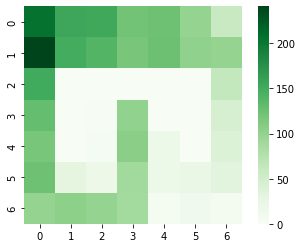

100%|██████████| 100/100 [00:23<00:00,  4.33it/s]


85
[66, 1004, 652, 202, 126, 124, 368, 86, 112, 128, 56, 64, 20, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


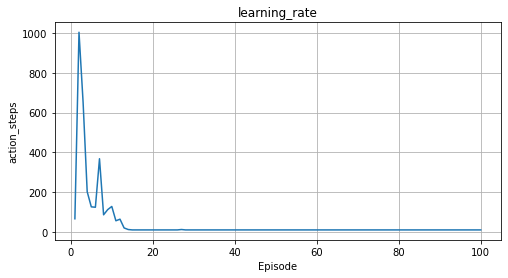

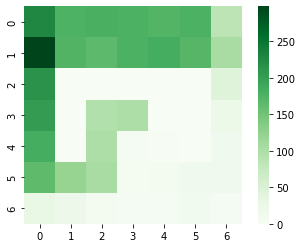

100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


81
[36, 138, 122, 70, 42, 210, 32, 192, 194, 34, 344, 38, 276, 32, 28, 10, 14, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


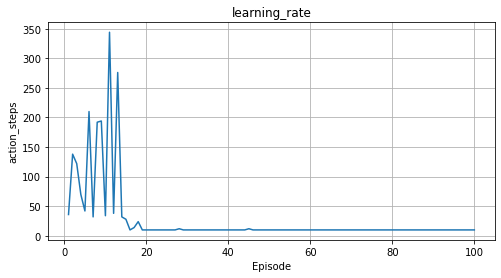

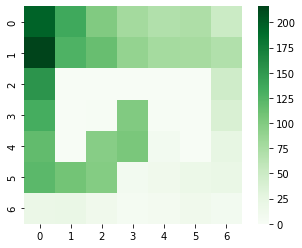

100%|██████████| 100/100 [00:15<00:00,  6.59it/s]


82
[88, 32, 292, 32, 286, 64, 210, 158, 108, 14, 148, 36, 22, 38, 72, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 16, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


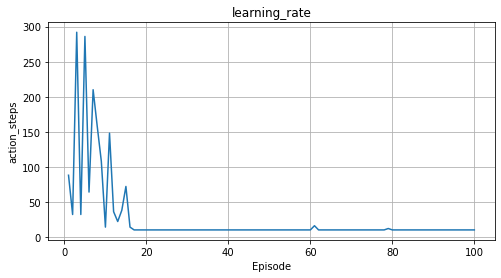

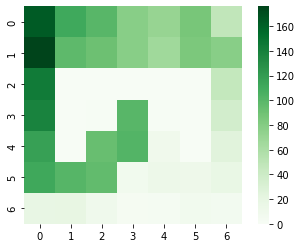

100%|██████████| 100/100 [00:14<00:00,  6.94it/s]


84
[316, 164, 144, 136, 60, 108, 220, 38, 32, 70, 120, 10, 10, 10, 10, 12, 10, 12, 10, 12, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 16, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


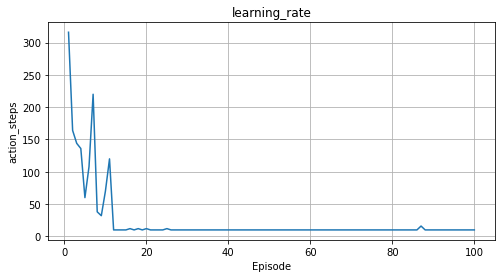

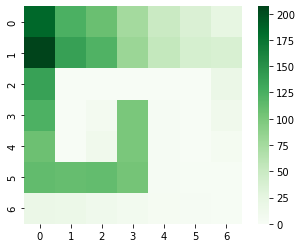

100%|██████████| 100/100 [00:18<00:00,  5.36it/s]


73
[134, 62, 106, 190, 192, 160, 44, 154, 78, 40, 38, 30, 448, 10, 166, 122, 16, 28, 18, 42, 62, 30, 54, 14, 14, 10, 16, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 18, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


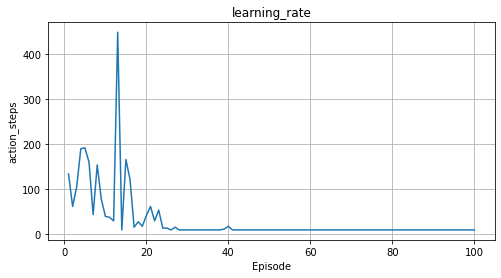

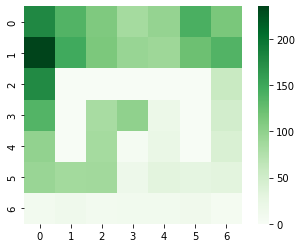

100%|██████████| 100/100 [00:19<00:00,  5.08it/s]


0
[286, 210, 42, 658, 112, 30, 268, 66, 30, 94, 64, 194, 92, 30, 34, 28, 18, 36, 36, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


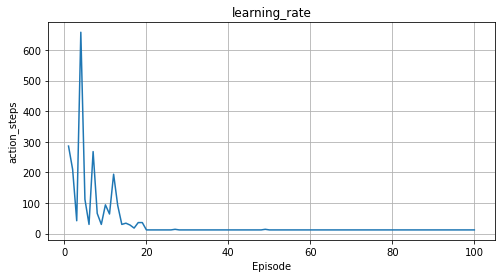

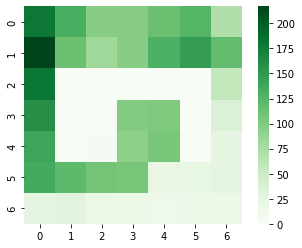

100%|██████████| 100/100 [00:19<00:00,  5.18it/s]


1
[152, 56, 498, 562, 206, 98, 34, 134, 14, 18, 40, 26, 10, 14, 24, 18, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


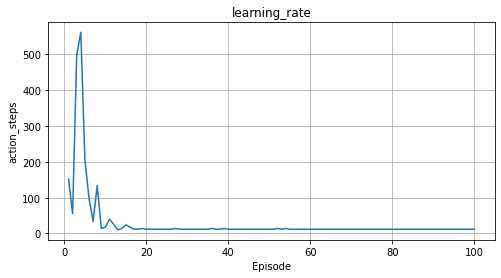

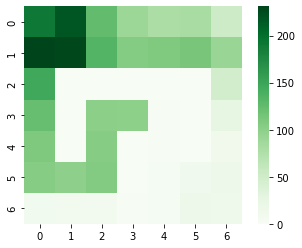

100%|██████████| 100/100 [00:20<00:00,  4.85it/s]


0
[788, 58, 30, 438, 150, 84, 142, 58, 32, 42, 136, 62, 92, 98, 48, 14, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


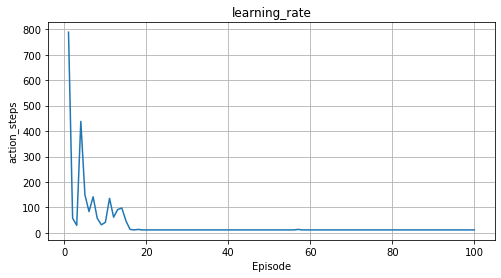

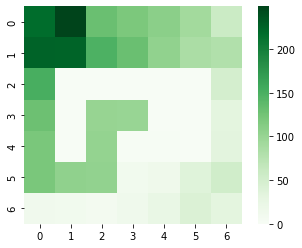

100%|██████████| 100/100 [00:26<00:00,  3.82it/s]


1
[340, 138, 664, 838, 98, 32, 342, 220, 56, 76, 86, 32, 44, 14, 14, 96, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


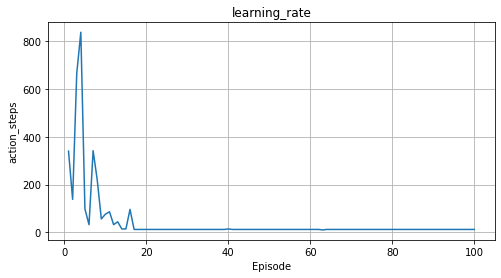

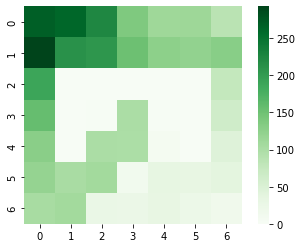

100%|██████████| 100/100 [00:15<00:00,  6.51it/s]

81
[172, 196, 288, 24, 104, 38, 78, 356, 46, 16, 18, 18, 178, 16, 14, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10]


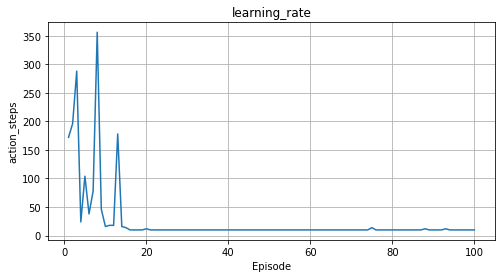

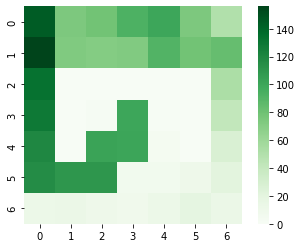

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]

0
[544, 54, 224, 38, 240, 124, 182, 236, 18, 34, 224, 38, 38, 18, 52, 52, 116, 12, 38, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12]


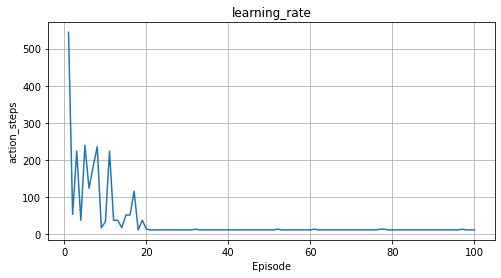

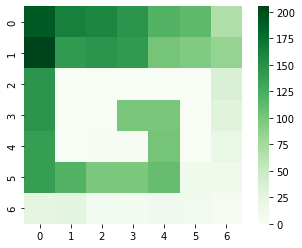

100%|██████████| 100/100 [00:20<00:00,  4.92it/s]


84
[348, 736, 92, 100, 252, 40, 112, 146, 248, 24, 58, 28, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


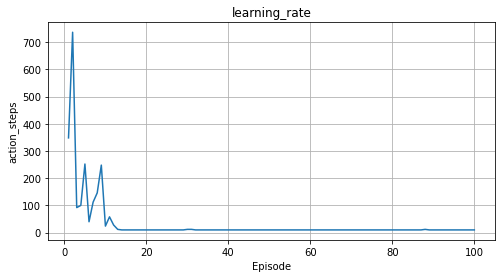

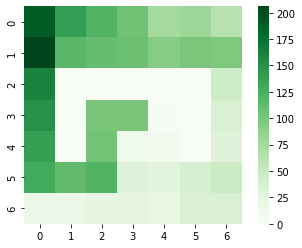

100%|██████████| 100/100 [00:28<00:00,  3.47it/s]

0
[80, 540, 96, 162, 162, 84, 266, 62, 496, 252, 146, 232, 182, 410, 20, 16, 50, 62, 226, 12, 14, 26, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 26, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


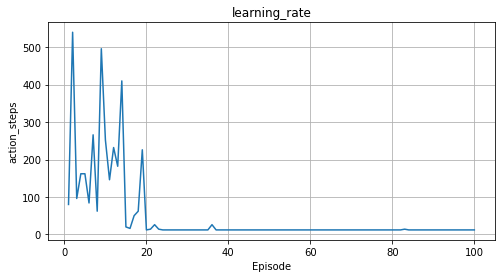

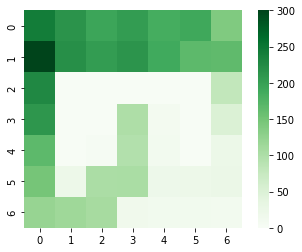

100%|██████████| 100/100 [00:16<00:00,  6.22it/s]


85
[46, 108, 84, 774, 26, 262, 126, 20, 22, 114, 130, 50, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


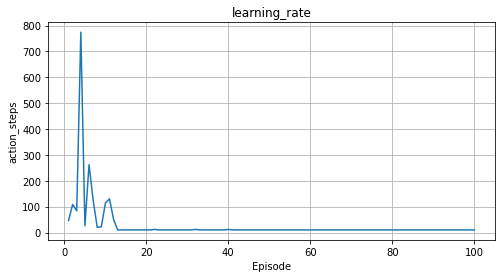

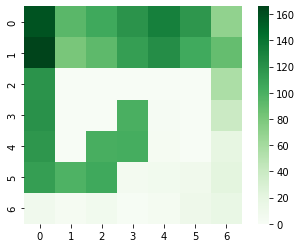

100%|██████████| 100/100 [00:25<00:00,  3.93it/s]


1
[352, 110, 388, 282, 94, 144, 256, 246, 32, 272, 108, 58, 14, 370, 328, 10, 100, 22, 12, 12, 14, 12, 12, 12, 12, 12, 22, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


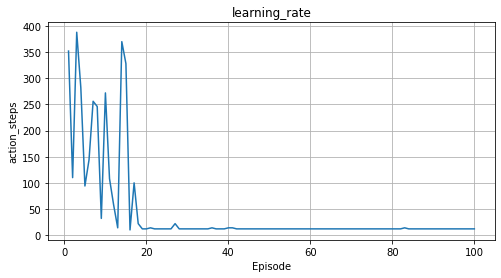

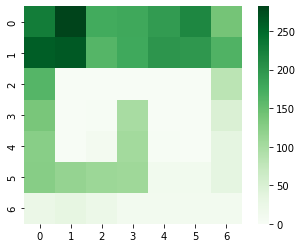

100%|██████████| 100/100 [00:25<00:00,  3.98it/s]


84
[154, 236, 502, 182, 122, 560, 336, 104, 362, 292, 154, 12, 96, 22, 12, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


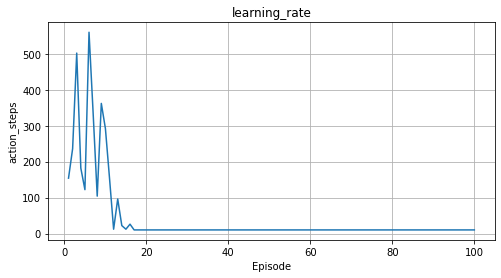

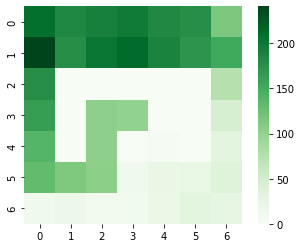

100%|██████████| 100/100 [00:19<00:00,  5.21it/s]


0
[58, 146, 172, 74, 62, 66, 58, 148, 82, 166, 74, 254, 28, 86, 80, 34, 132, 20, 24, 20, 34, 20, 36, 30, 36, 16, 18, 20, 18, 16, 14, 22, 18, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 20, 16, 16, 16, 16, 16, 16]


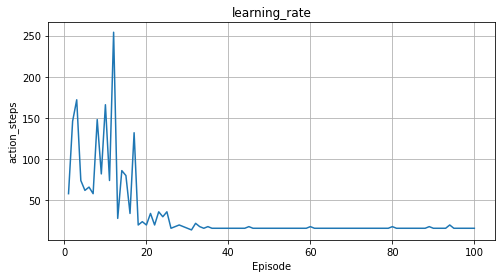

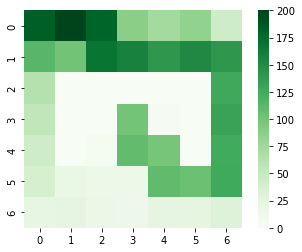

100%|██████████| 100/100 [00:18<00:00,  5.26it/s]


85
[90, 656, 552, 380, 58, 126, 48, 22, 194, 16, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


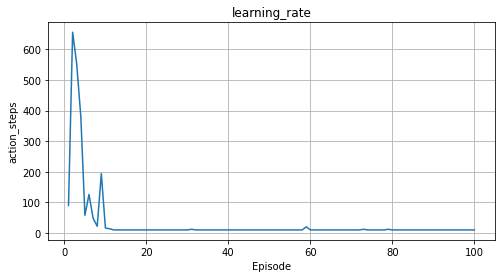

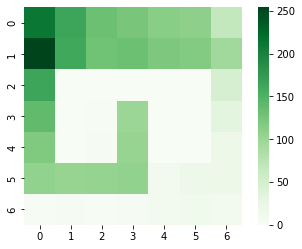

100%|██████████| 100/100 [00:29<00:00,  3.43it/s]


0
[54, 550, 160, 142, 46, 322, 264, 202, 388, 222, 100, 278, 22, 94, 30, 38, 80, 22, 78, 52, 114, 22, 34, 24, 50, 44, 24, 22, 20, 14, 14, 18, 14, 18, 18, 16, 18, 16, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


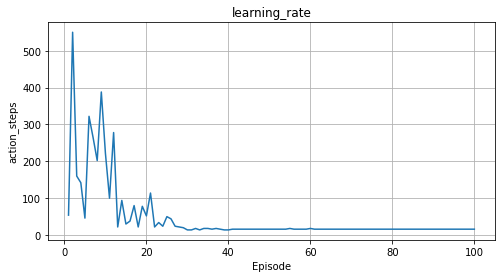

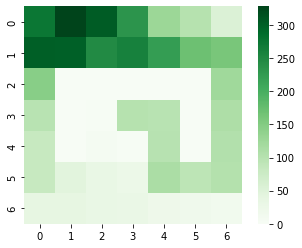

100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


0
[22, 176, 38, 160, 258, 76, 170, 244, 58, 204, 42, 26, 50, 114, 114, 24, 108, 220, 42, 24, 60, 20, 42, 18, 20, 20, 16, 14, 14, 14, 14, 14, 14, 14, 12, 14, 14, 14, 14, 12, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]


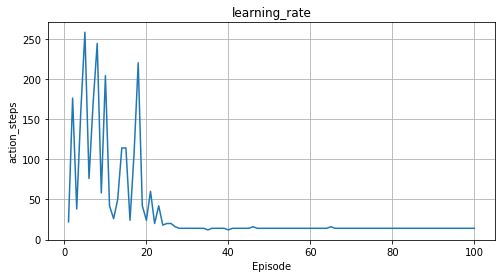

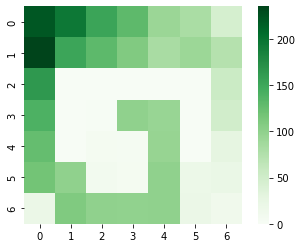

100%|██████████| 100/100 [00:19<00:00,  5.00it/s]


85
[166, 128, 242, 756, 218, 28, 148, 12, 286, 90, 16, 48, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10]


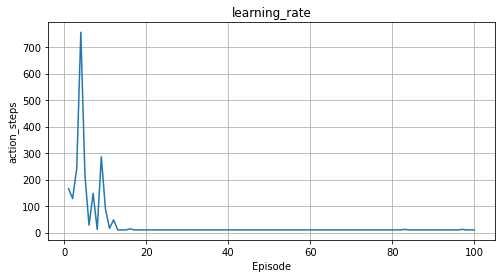

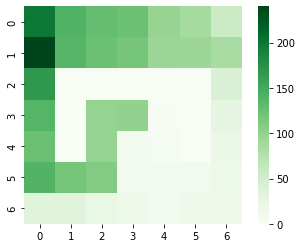

100%|██████████| 100/100 [00:17<00:00,  5.86it/s]


82
[306, 314, 64, 136, 286, 82, 120, 92, 14, 116, 286, 50, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10]


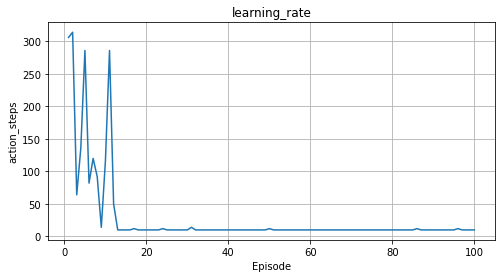

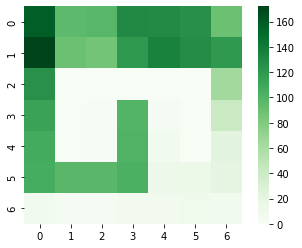

100%|██████████| 100/100 [00:14<00:00,  6.87it/s]


81
[112, 56, 262, 32, 28, 226, 96, 360, 20, 42, 24, 10, 70, 42, 16, 46, 90, 10, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


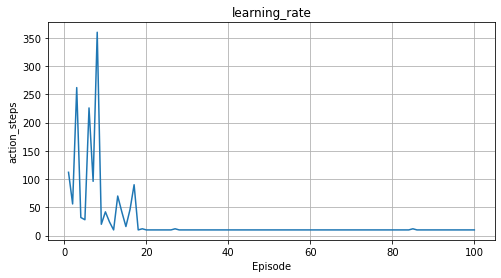

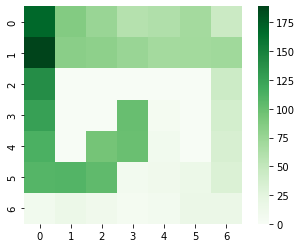

100%|██████████| 100/100 [00:18<00:00,  5.55it/s]


88
[344, 182, 324, 74, 44, 536, 102, 40, 224, 134, 18, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


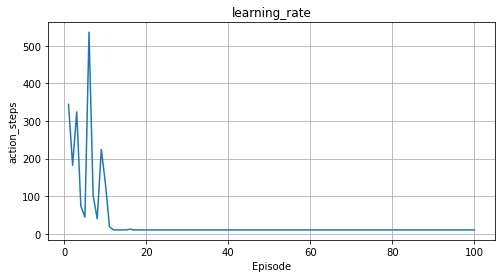

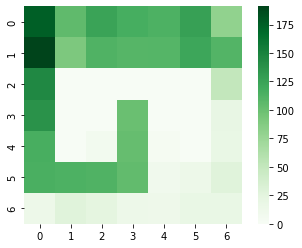

100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


0
[44, 64, 46, 222, 512, 38, 480, 282, 80, 106, 130, 36, 56, 24, 96, 24, 42, 20, 16, 18, 30, 18, 32, 18, 20, 16, 42, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


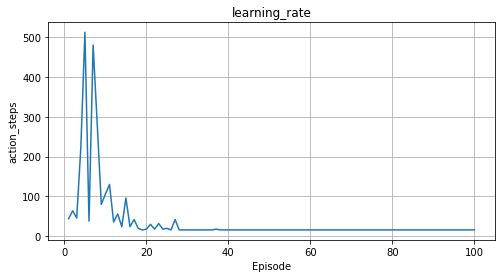

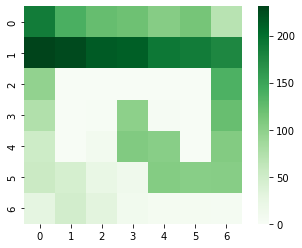

100%|██████████| 100/100 [00:15<00:00,  6.55it/s]


85
[82, 124, 190, 38, 78, 14, 250, 394, 36, 130, 86, 124, 16, 12, 10, 10, 10, 16, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


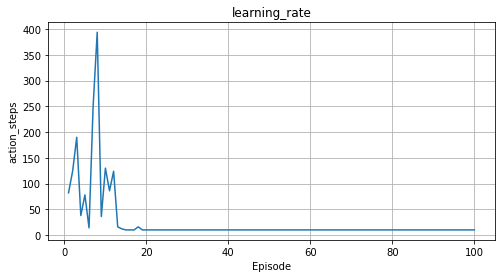

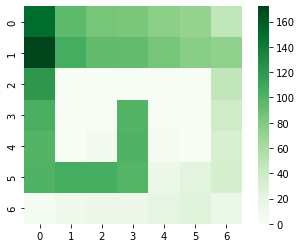

100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


1
[30, 62, 256, 380, 158, 78, 114, 400, 114, 56, 28, 248, 46, 120, 40, 54, 164, 62, 136, 12, 28, 28, 48, 22, 74, 36, 14, 34, 44, 12, 12, 20, 12, 26, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 12, 12, 12, 12, 12, 12, 12, 12, 18, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 18, 12, 12, 12]


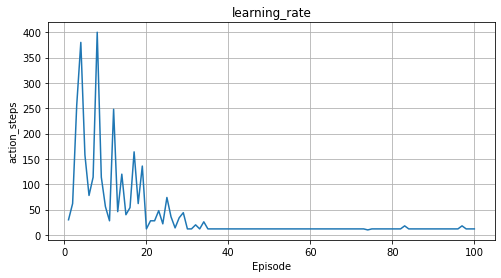

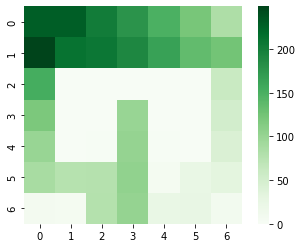

100%|██████████| 100/100 [00:28<00:00,  3.52it/s]


72
[200, 276, 366, 44, 184, 266, 286, 432, 428, 182, 398, 86, 212, 18, 114, 122, 62, 40, 32, 34, 16, 16, 12, 28, 18, 14, 18, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


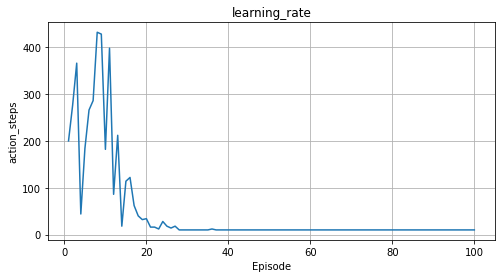

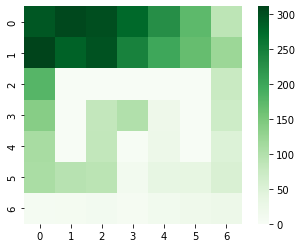

100%|██████████| 100/100 [00:21<00:00,  4.59it/s]


0
[172, 168, 168, 234, 72, 54, 196, 52, 610, 224, 18, 130, 64, 16, 102, 96, 60, 18, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 16, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 14, 12, 12, 12, 12, 12, 12, 12]


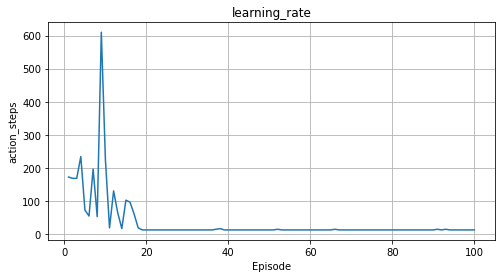

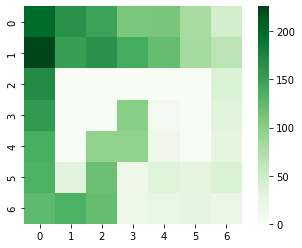

100%|██████████| 100/100 [00:17<00:00,  5.84it/s]


79
[332, 64, 236, 202, 116, 70, 70, 62, 146, 26, 44, 332, 56, 14, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 12, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


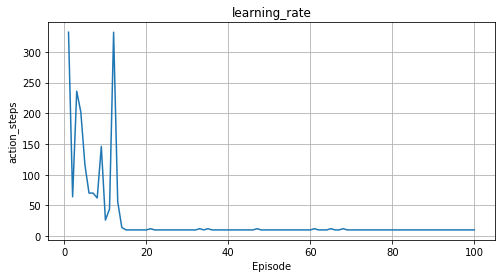

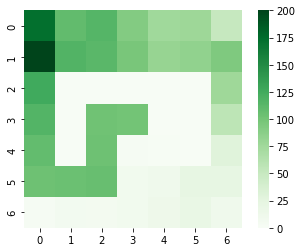

100%|██████████| 100/100 [00:17<00:00,  5.84it/s]


77
[62, 72, 20, 42, 352, 268, 36, 30, 272, 344, 14, 34, 58, 122, 22, 122, 20, 12, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14]


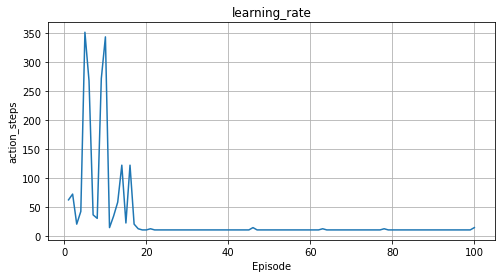

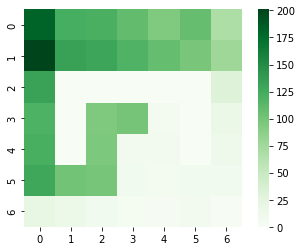

100%|██████████| 100/100 [00:15<00:00,  6.27it/s]


0
[110, 50, 272, 68, 282, 32, 122, 44, 90, 28, 220, 84, 28, 20, 12, 12, 24, 24, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


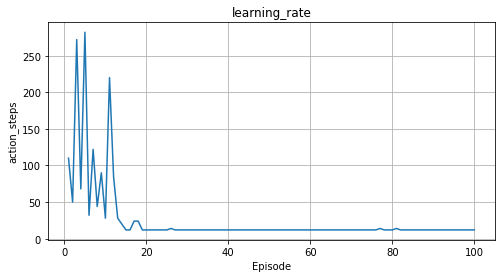

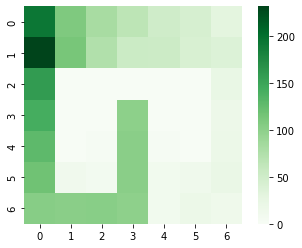

100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


78
[34, 140, 78, 36, 72, 86, 288, 26, 48, 334, 72, 86, 48, 304, 26, 20, 22, 206, 28, 24, 22, 18, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


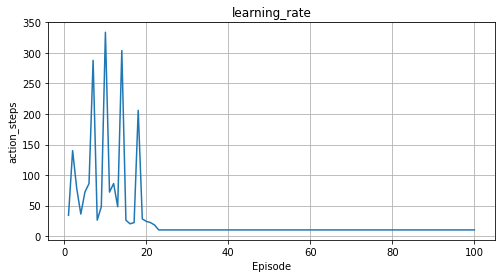

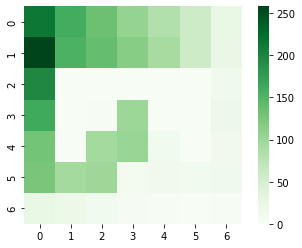

100%|██████████| 100/100 [00:25<00:00,  3.93it/s]


75
[120, 84, 226, 70, 88, 442, 138, 180, 272, 22, 128, 180, 292, 72, 104, 24, 30, 14, 92, 20, 76, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 38, 10, 10]


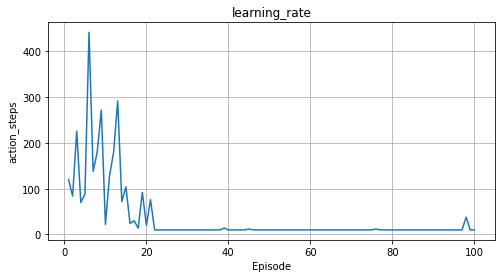

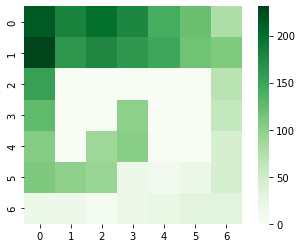

100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


0
[394, 434, 124, 100, 176, 342, 120, 50, 52, 28, 34, 56, 24, 82, 16, 26, 26, 26, 28, 36, 24, 16, 16, 18, 16, 20, 16, 16, 20, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


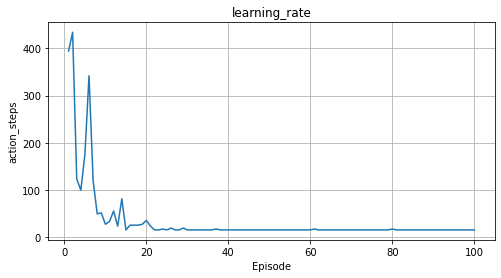

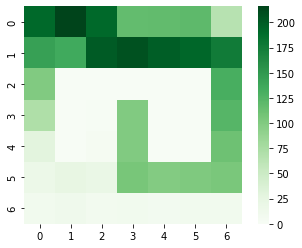

100%|██████████| 100/100 [00:23<00:00,  4.18it/s]


0
[146, 910, 48, 90, 26, 78, 164, 360, 264, 36, 202, 54, 110, 42, 120, 82, 42, 36, 50, 46, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 14, 12, 12]


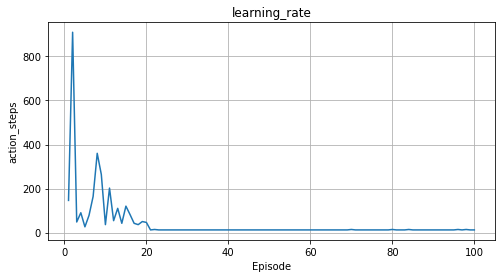

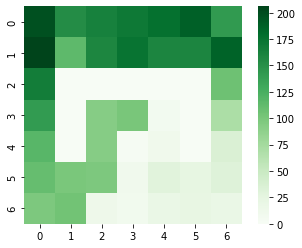

100%|██████████| 100/100 [00:19<00:00,  5.25it/s]


77
[124, 468, 42, 62, 58, 80, 128, 200, 46, 316, 26, 330, 84, 126, 50, 20, 32, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10]


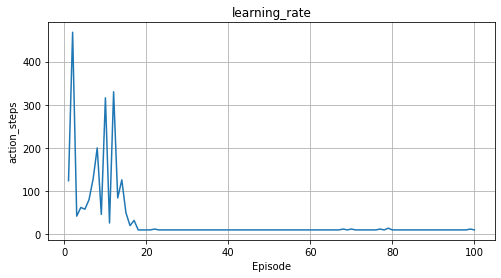

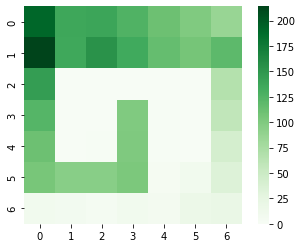

100%|██████████| 100/100 [00:31<00:00,  3.19it/s]


0
[100, 222, 1126, 660, 30, 110, 32, 578, 72, 156, 202, 34, 44, 48, 82, 78, 12, 50, 20, 20, 24, 36, 16, 14, 14, 20, 32, 20, 24, 16, 20, 26, 18, 16, 20, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


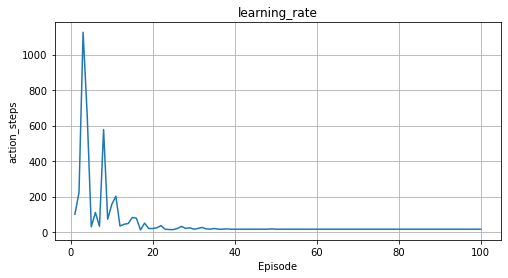

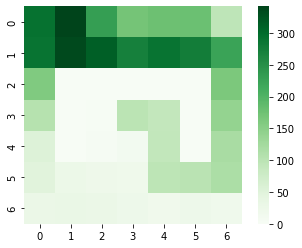

100%|██████████| 100/100 [00:17<00:00,  5.60it/s]


0
[188, 72, 242, 76, 108, 140, 116, 112, 98, 88, 272, 78, 20, 48, 34, 14, 188, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


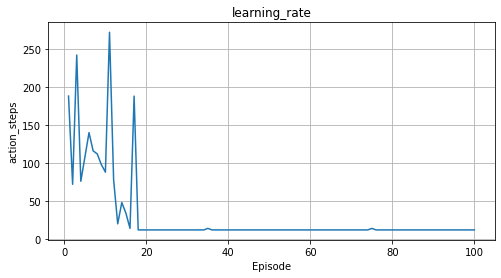

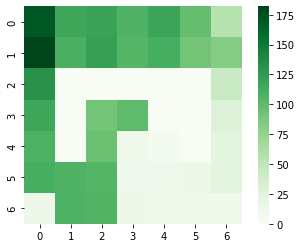

100%|██████████| 100/100 [00:18<00:00,  5.39it/s]


79
[238, 290, 60, 176, 76, 58, 284, 200, 92, 22, 188, 70, 62, 88, 74, 82, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 12, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10]


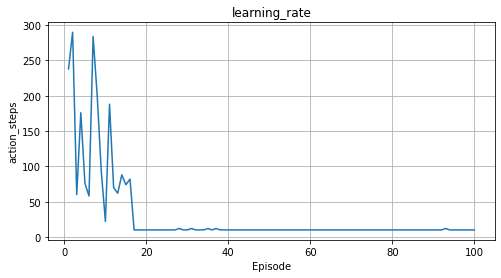

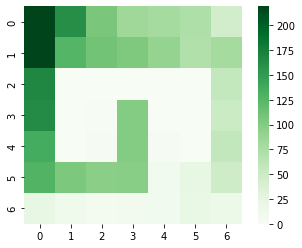

100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


81
[178, 196, 26, 58, 180, 24, 58, 204, 110, 48, 186, 32, 10, 162, 10, 12, 10, 10, 10, 10, 10, 12, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


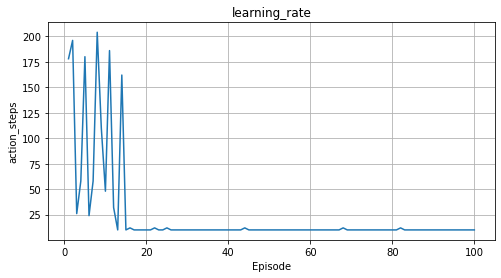

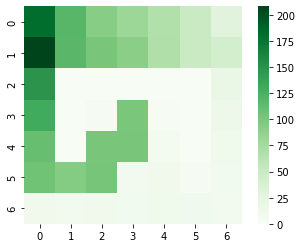

100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


77
[54, 884, 400, 58, 78, 130, 94, 70, 132, 214, 32, 40, 156, 10, 92, 228, 138, 32, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10]


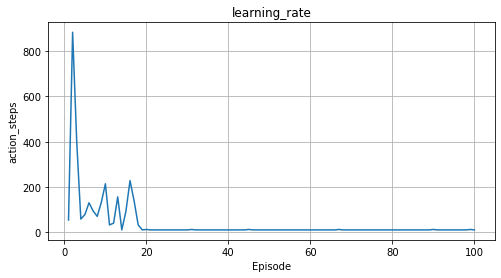

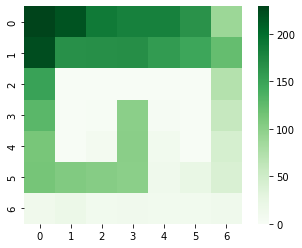

100%|██████████| 100/100 [00:17<00:00,  5.78it/s]


81
[110, 148, 144, 346, 260, 84, 90, 52, 102, 232, 224, 90, 12, 26, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 12, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


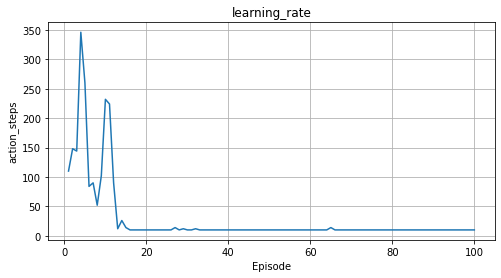

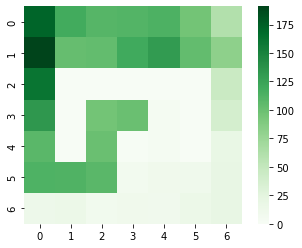

100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


0
[232, 68, 46, 416, 148, 106, 172, 330, 20, 192, 202, 64, 32, 26, 52, 22, 138, 56, 74, 86, 60, 34, 14, 30, 30, 14, 20, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]


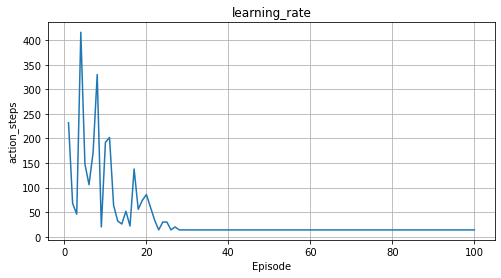

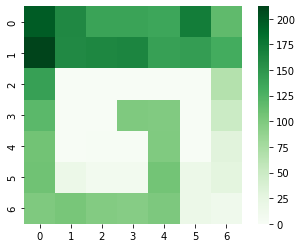

100%|██████████| 100/100 [00:18<00:00,  5.44it/s]


0
[210, 230, 56, 424, 126, 46, 22, 24, 262, 86, 68, 322, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


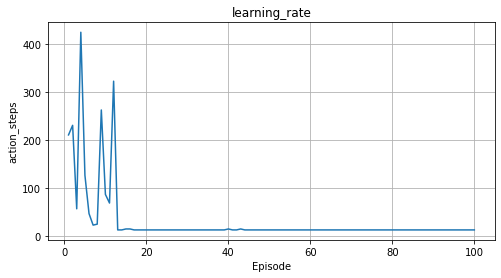

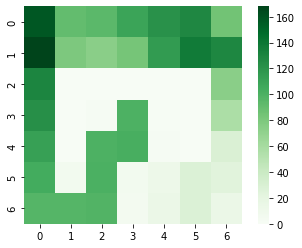

100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


78
[414, 34, 868, 224, 74, 222, 294, 68, 64, 148, 98, 34, 220, 12, 38, 122, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


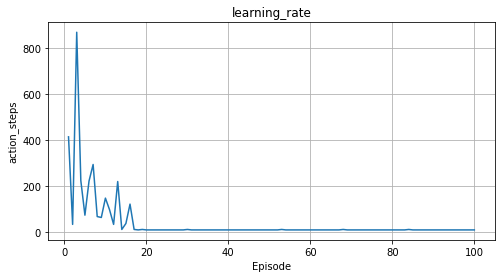

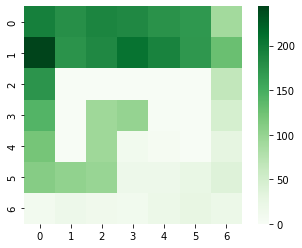

100%|██████████| 100/100 [00:16<00:00,  6.00it/s]


74
[76, 210, 190, 234, 88, 60, 118, 16, 64, 260, 32, 90, 50, 104, 24, 46, 56, 18, 26, 28, 50, 12, 28, 24, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


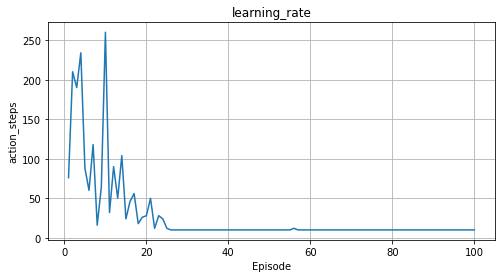

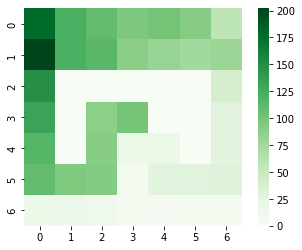

100%|██████████| 100/100 [00:18<00:00,  5.43it/s]


87
[74, 474, 300, 72, 150, 22, 14, 608, 52, 198, 22, 18, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


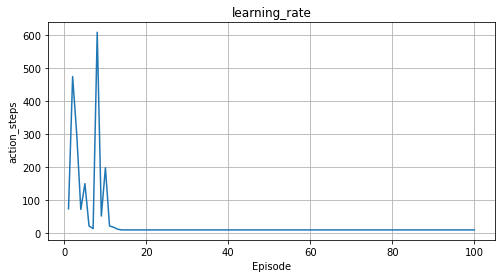

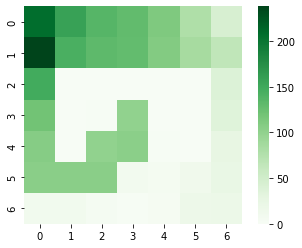

100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


0
[532, 530, 66, 286, 496, 52, 326, 178, 50, 132, 26, 112, 308, 128, 198, 74, 250, 216, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


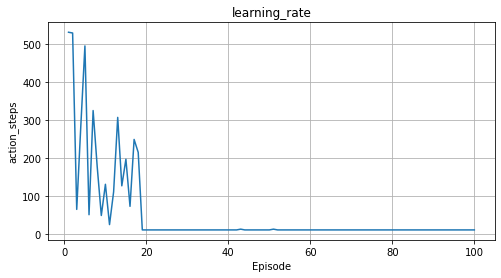

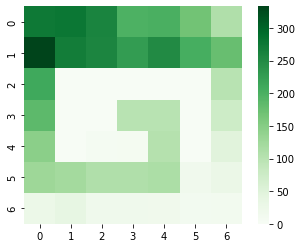

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


83
[226, 162, 828, 224, 114, 264, 18, 358, 102, 14, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 16, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


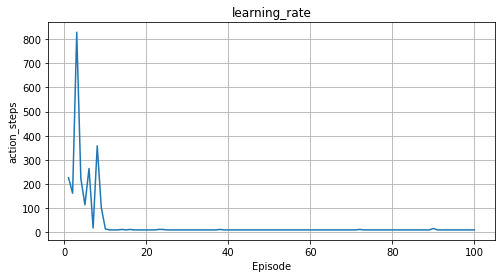

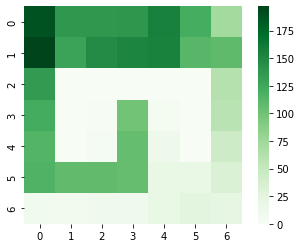

100%|██████████| 100/100 [00:11<00:00,  8.52it/s]


84
[154, 102, 106, 48, 26, 40, 208, 82, 74, 14, 12, 22, 56, 26, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


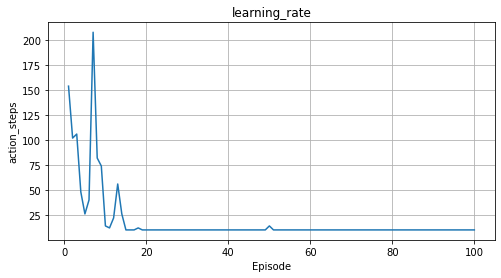

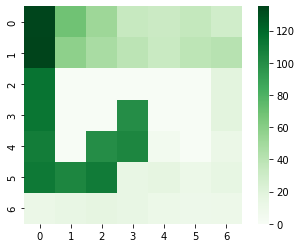

100%|██████████| 100/100 [00:14<00:00,  7.10it/s]


85
[190, 152, 138, 100, 202, 46, 60, 60, 208, 28, 180, 14, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


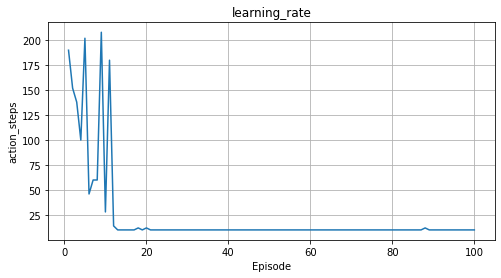

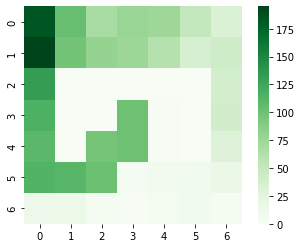

100%|██████████| 100/100 [00:21<00:00,  4.63it/s]

1
[282, 32, 186, 218, 494, 150, 118, 148, 188, 72, 32, 20, 52, 88, 52, 14, 20, 46, 24, 46, 20, 42, 32, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


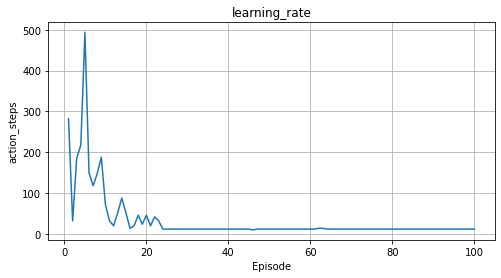

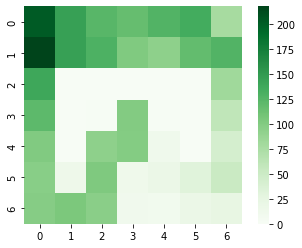

100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


1
[88, 198, 230, 52, 572, 136, 46, 156, 178, 80, 30, 24, 40, 50, 20, 64, 22, 20, 66, 20, 40, 24, 34, 20, 28, 44, 18, 18, 16, 30, 36, 10, 16, 22, 24, 18, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 20, 16, 16, 16, 16, 16, 16, 16, 16]


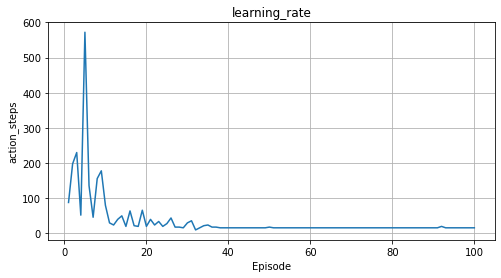

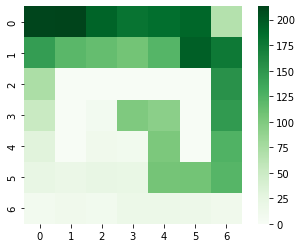

100%|██████████| 100/100 [00:14<00:00,  7.05it/s]


84
[114, 168, 40, 38, 430, 50, 100, 240, 42, 34, 22, 24, 104, 10, 42, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


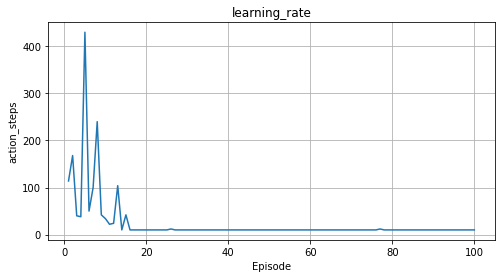

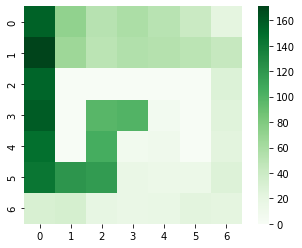

100%|██████████| 100/100 [00:17<00:00,  5.86it/s]


78
[136, 306, 246, 130, 84, 98, 48, 292, 30, 28, 30, 222, 36, 226, 36, 52, 16, 10, 10, 14, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


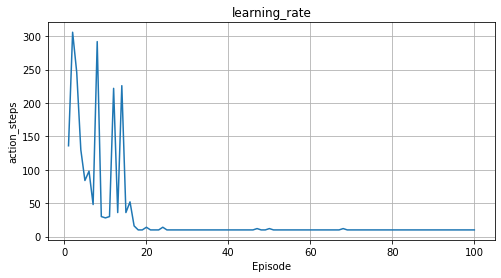

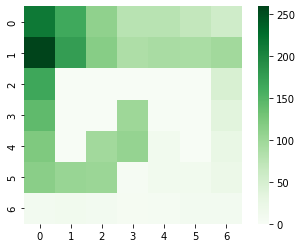

100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


79
[102, 194, 98, 110, 44, 138, 34, 122, 68, 130, 242, 30, 24, 10, 48, 36, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10]


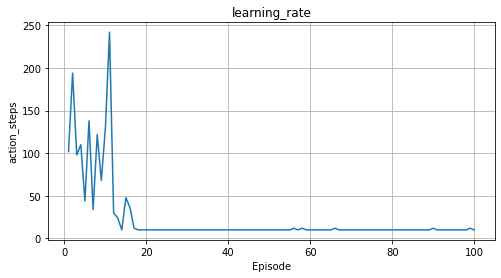

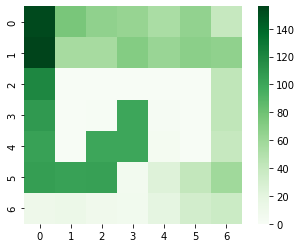

100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


84
[192, 270, 70, 176, 106, 248, 34, 14, 308, 102, 28, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10]


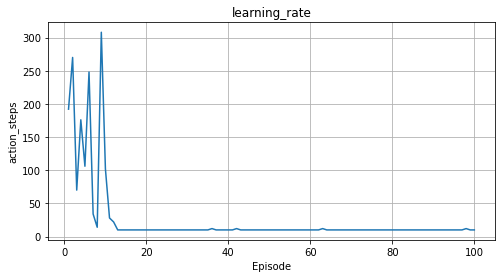

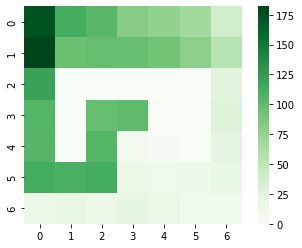

100%|██████████| 100/100 [00:18<00:00,  5.41it/s]


81
[754, 196, 264, 162, 30, 28, 400, 158, 18, 56, 12, 16, 16, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


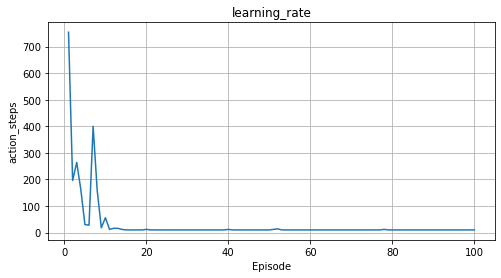

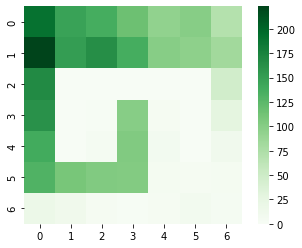

100%|██████████| 100/100 [00:19<00:00,  5.13it/s]


0
[70, 252, 144, 54, 240, 108, 228, 316, 300, 14, 262, 68, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14]


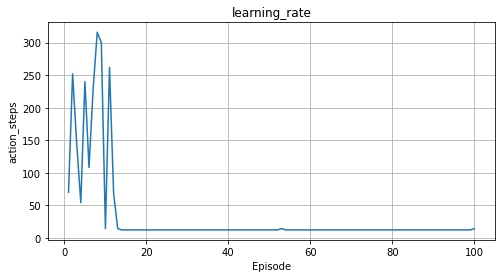

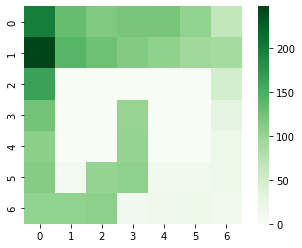

100%|██████████| 100/100 [00:25<00:00,  3.85it/s]

0
[138, 382, 552, 34, 136, 298, 238, 94, 60, 62, 26, 32, 22, 48, 24, 94, 76, 38, 42, 34, 24, 48, 22, 32, 22, 52, 20, 28, 18, 24, 32, 36, 22, 20, 18, 18, 18, 18, 18, 18, 18, 18, 20, 18, 22, 20, 18, 20, 20, 24, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]


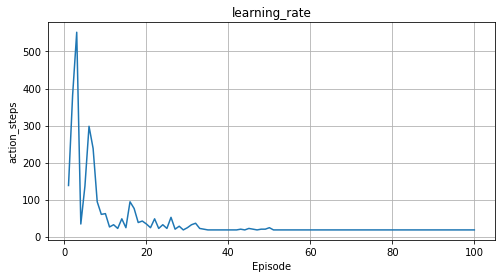

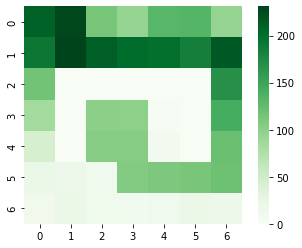

100%|██████████| 100/100 [00:28<00:00,  3.46it/s]


0
[274, 166, 248, 34, 194, 240, 490, 252, 180, 134, 136, 172, 48, 210, 140, 210, 28, 38, 52, 144, 20, 34, 32, 22, 32, 22, 52, 22, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


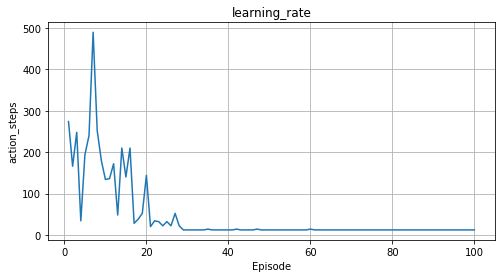

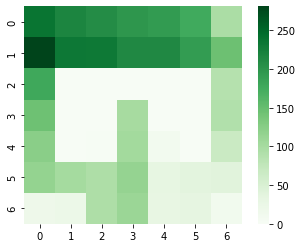

100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


82
[154, 282, 118, 38, 344, 196, 112, 28, 108, 204, 16, 12, 12, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


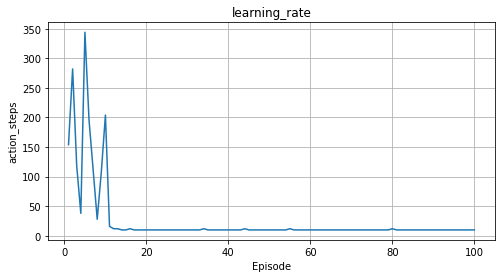

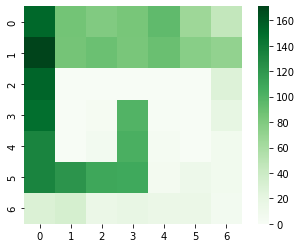

100%|██████████| 100/100 [00:13<00:00,  7.27it/s]


84
[232, 232, 206, 164, 216, 12, 22, 42, 36, 10, 24, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 60, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


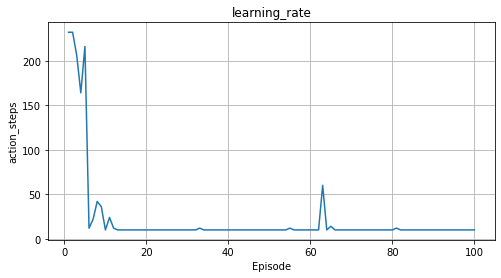

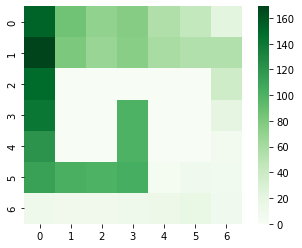

100%|██████████| 100/100 [00:16<00:00,  6.21it/s]

78
[68, 202, 94, 352, 300, 30, 52, 102, 52, 54, 126, 84, 44, 18, 34, 20, 52, 44, 12, 10, 10, 14, 10, 10, 10, 10, 42, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


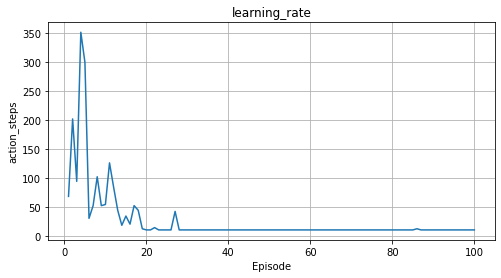

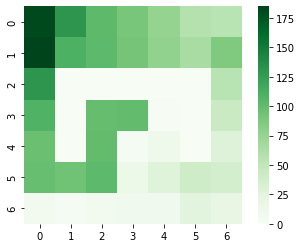

100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


79
[192, 32, 92, 98, 266, 90, 534, 142, 86, 98, 52, 24, 24, 18, 24, 18, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


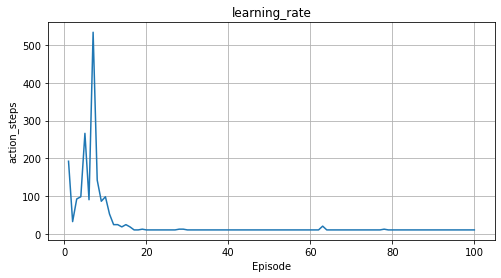

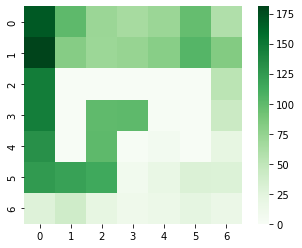

100%|██████████| 100/100 [00:13<00:00,  7.45it/s]


0
[82, 148, 54, 54, 24, 22, 34, 226, 70, 88, 18, 88, 112, 18, 24, 64, 16, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12]


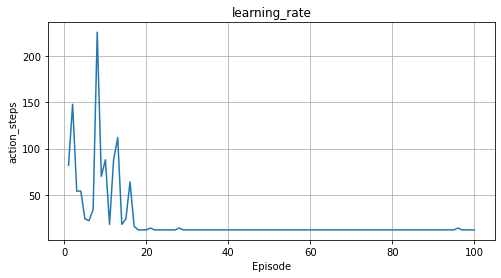

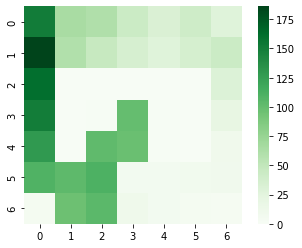

100%|██████████| 100/100 [00:16<00:00,  6.06it/s]


80
[240, 300, 120, 62, 226, 72, 176, 126, 86, 22, 158, 22, 18, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10]


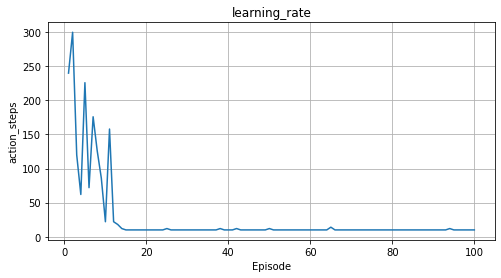

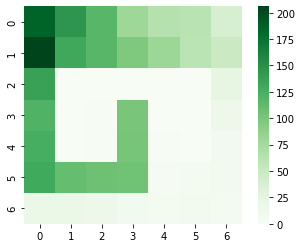

100%|██████████| 100/100 [00:16<00:00,  5.90it/s]


82
[242, 172, 32, 230, 116, 74, 102, 138, 214, 402, 36, 34, 26, 12, 14, 16, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


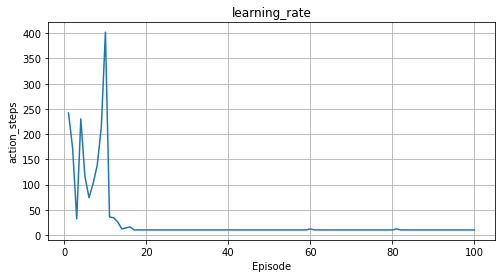

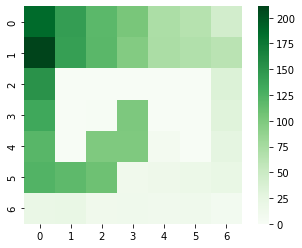

100%|██████████| 100/100 [00:18<00:00,  5.33it/s]


83
[454, 66, 244, 342, 48, 40, 202, 12, 28, 258, 38, 330, 12, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


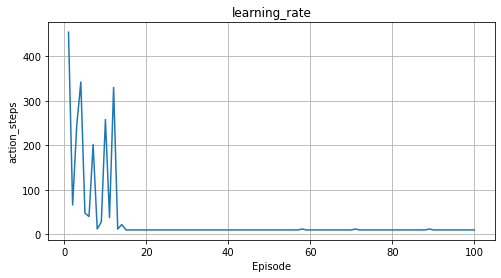

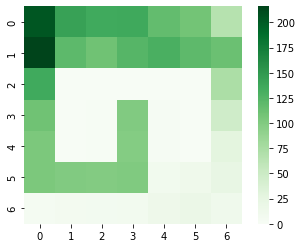

100%|██████████| 100/100 [00:19<00:00,  5.21it/s]


0
[40, 132, 114, 46, 54, 234, 38, 114, 662, 14, 82, 194, 128, 30, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


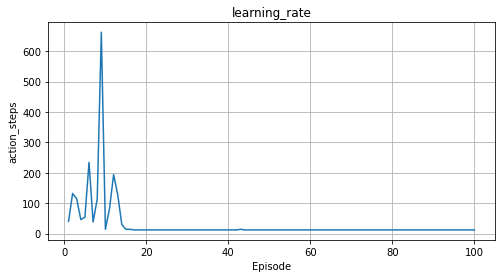

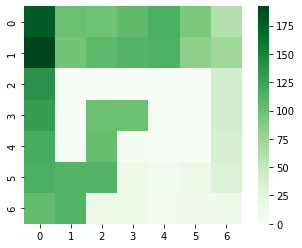

100%|██████████| 100/100 [00:16<00:00,  5.98it/s]


79
[180, 70, 224, 44, 280, 118, 52, 316, 88, 68, 30, 242, 10, 68, 14, 22, 24, 14, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10]


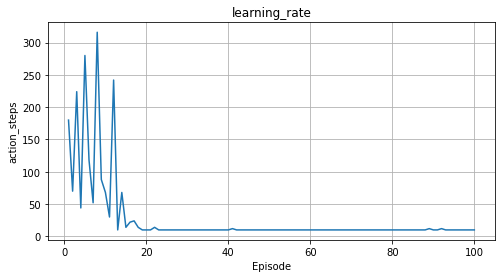

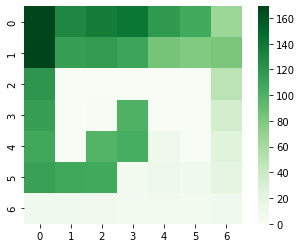

100%|██████████| 100/100 [00:20<00:00,  4.84it/s]


79
[60, 224, 122, 204, 194, 82, 158, 140, 560, 214, 278, 32, 22, 32, 30, 40, 10, 12, 20, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


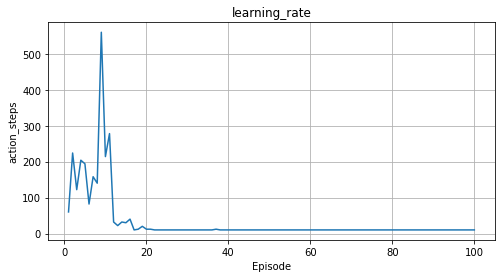

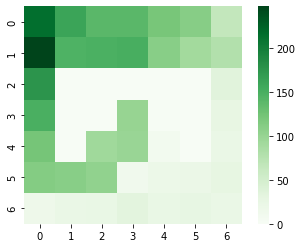

100%|██████████| 100/100 [00:14<00:00,  7.00it/s]


83
[84, 68, 28, 62, 306, 346, 52, 182, 34, 12, 42, 46, 16, 10, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


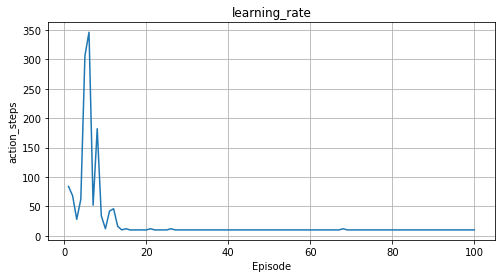

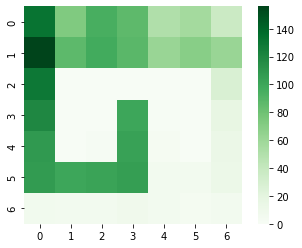

number of min_a 64
Finish


In [ ]:
from environment import Maze
from agent import Agent

def train():
    kernel = 2 # Thickness of the outer wall of the maze (extension)
    start = [1, 1] # Specify the start position
    goal = [4, 4] # Specify the goal position
    min_a_cnt = 0
      
    """Automatically generate the maze"""
    env = Maze(7, 7) # Specify the size of the maze
    env.set_out_wall() # Surround the maze with walls
    env.set_start_goal(start, goal) # Specify start and goal
    env.bg_maze(kernel) # Expand the maze cells by kernel

    """Generate agent in the environment and train"""
    epochs = 100 # Number of episode trials
    episode_count = 100 # Number of episodes
    for epoch in range(1, epochs+1):
        epsilon = 0.1
        agent = Agent(env.maze, action_num=4) # Pass the maze with start/goal/wall etc. to the agent
        a_cnt = env.run(agent, epoch, episode_count)
        if a_cnt == 10:
            min_a_cnt += 1
            
    print('number of min_a', min_a_cnt)
    print('Finish')


if __name__ == "__main__":
    train()


### Calculation / Action Decision / Determination of n_state / Use the value of n_state to update Q-value /

In [ ]:
def named_arr(name):
    row = 2
    col = 9
    directions_1 = ["U", "R", "L", "D"]
    directions_2 = ["U", "R", "L", "D", "S"]
    tmp_arr = []
    
    if name == "SNr" or name == "xs":
        for direction_1 in directions_1:
            for direction_2 in directions_2:
                tmp_arr += [name+str(i)+str(j)+direction_1+direction_2 for i in range(row, col) for j in range(row, col)]
        return tmp_arr
    
    else:    
        for direction in directions_1:
            tmp_arr += [name+str(i)+str(j)+direction for i in range(row, col) for j in range(row, col)] 
        return tmp_arr


names = ["x", "D1", "D2", "lc_gpe", "gl_gpe", "lc_hyper", "gl_hyper", "SNr", "xs", "strio", "DA"]
for name in names:
    if name == "x":
        x_ar = self.named_arr(name, row, col)
    elif name == "D1":
        d1_ar = named_arr(name)
    elif name == "D2":
        d2_ar = named_arr(name)
    elif name == "lc_gpe":
        lc_gpe_ar = named_arr(name)
    elif name == "gl_gpe":
        gl_gpe_ar = named_arr(name)
    elif name == "lc_hyper":
        lc_hyper_ar = named_arr(name)
    elif name == "gl_hyper":
        gl_hyper_ar = named_arr(name)
    elif name == "SNr":
        SNr_ar = named_arr(name)
    elif name == "xs":
        xs_ar = named_arr(name)
    elif name == "strio":
        strio_ar = named_arr(name)
    elif name == "DA":
        da_ar = named_arr(name)
                    